# IMPORT LIBRARIES

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
import numpy as np
import seaborn as sns #pip install seaborn
import matplotlib #pip install matplotlib
import matplotlib.pyplot as plt
import sklearn #pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# pip install lazypredict-nightly yaparak sorun çozuldu
import lazypredict
import lazypredict.Supervised
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from sklearn.neighbors import KernelDensity
from scipy.stats import yeojohnson, skew
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor



ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
df=pd.read_excel('patients_glu.xlsx') # Data import

In [ ]:
len(df)

501482

In [ ]:
df.head() # Data

,Id,Kayıt Tar.,Age,Gender,Glucose,HbA1c
0,3,2024-03-28 10:12:00,36,woman,81.0,NaN
1,3,2024-06-04 09:15:00,36,woman,80.0,5.3
2,7,2024-03-25 09:44:00,52,man,NaN,5.3
3,7,2024-05-23 10:17:00,52,man,NaN,5.7
4,9,2024-06-13 09:36:00,24,man,NaN,5.4


In [ ]:
df.tail() # Data from tail

,Id,Kayıt Tar.,Age,Gender,Glucose,HbA1c
501477,456511,2024-06-28 10:08:00,55,woman,117.0,NaN
501478,456512,2024-06-11 09:00:00,10,man,NaN,5.1
501479,456512,2024-06-11 09:00:00,10,man,90.0,NaN
501480,456513,2024-06-11 09:02:00,12,woman,98.0,NaN
501481,456513,2024-06-11 09:03:00,12,woman,NaN,5.5


In [ ]:
df.shape # 501482 rows 6 columns

(501482, 6)

# Data Preparation  for  ML

In [ ]:
df['Kayıt Tar.'] = df['Kayıt Tar.'].dt.strftime('%m/%d/%Y')
df

,Id,Kayıt Tar.,Age,Gender,Glucose,HbA1c
0,3,03/28/2024,36,woman,81.0,NaN
1,3,06/04/2024,36,woman,80.0,5.3
2,7,03/25/2024,52,man,NaN,5.3
3,7,05/23/2024,52,man,NaN,5.7
4,9,06/13/2024,24,man,NaN,5.4
...,...,...,...,...,...,...
501477,456511,06/28/2024,55,woman,117.0,NaN
501478,456512,06/11/2024,10,man,NaN,5.1
501479,456512,06/11/2024,10,man,90.0,NaN
501480,456513,06/11/2024,12,woman,98.0,NaN


In [ ]:
df['Kayıt Tar.'] = pd.to_datetime(df['Kayıt Tar.'])
df

,Id,Kayıt Tar.,Age,Gender,Glucose,HbA1c
0,3,2024-03-28,36,woman,81.0,NaN
1,3,2024-06-04,36,woman,80.0,5.3
2,7,2024-03-25,52,man,NaN,5.3
3,7,2024-05-23,52,man,NaN,5.7
4,9,2024-06-13,24,man,NaN,5.4
...,...,...,...,...,...,...
501477,456511,2024-06-28,55,woman,117.0,NaN
501478,456512,2024-06-11,10,man,NaN,5.1
501479,456512,2024-06-11,10,man,90.0,NaN
501480,456513,2024-06-11,12,woman,98.0,NaN


In [ ]:
# Group by 'Id' and 'Kayıt Tar.' and aggregate
grouped_df = df.groupby(['Id', 'Kayıt Tar.'], as_index=False).agg({
    'Age': 'first',
    'Gender': 'first',
    'Glucose': lambda x: x.mode().iloc[0] if not x.mode().empty else None,  # Get the first mode or None
    'HbA1c': lambda x: x.mode().iloc[0] if not x.mode().empty else None     # Get the first mode or None
})

In [ ]:
grouped_df.head()

,Id,Kayıt Tar.,Age,Gender,Glucose,HbA1c
0,3,2024-03-28,36,woman,81.00,NaN
1,3,2024-06-04,36,woman,80.00,5.30
2,7,2024-03-25,52,man,NaN,5.30
3,7,2024-05-23,52,man,NaN,5.70
4,9,2024-06-13,24,man,87.00,5.40


In [ ]:
grouped_df = grouped_df.dropna(subset=['Glucose'])
grouped_df = grouped_df.dropna(subset=['HbA1c'])
grouped_df.reset_index(drop=True, inplace=True)

In [ ]:
grouped_df.dtypes

,0
Id,int64
Kayıt Tar.,datetime64[ns]
Age,object
Gender,object
Glucose,float64
HbA1c,float64


In [ ]:
grouped_df['Age'] = grouped_df['Age'].apply(lambda x: 0 if '/' in str(x) else x) # correction for babies below 1 year

In [ ]:
grouped_df = grouped_df.dropna(subset=['Age'])

In [ ]:
# Convert 'Age' from object to integer, coercing errors to NaN
grouped_df['Age'] = pd.to_numeric(grouped_df['Age'], errors='coerce').astype('Int64')  # Using 'Int64' for nullable integers

In [ ]:
df = grouped_df.copy()
len(df)

197190

In [ ]:
df.eq(0).any()

,0
Id,False
Kayıt Tar.,False
Age,False
Gender,False
Glucose,False
HbA1c,False


In [ ]:
# Identify categorical columns, sözel veri içeren kolonları tespit et
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender'], dtype='object')

In [ ]:
df=pd.get_dummies(df, columns=['Gender'], drop_first=True)
df

,Id,Kayıt Tar.,Age,Glucose,HbA1c,Gender_woman
0,3,2024-03-28,36,81.0,NaN,True
1,3,2024-06-04,36,80.0,5.3,True
2,7,2024-03-25,52,NaN,5.3,False
3,7,2024-05-23,52,NaN,5.7,False
4,9,2024-06-13,24,NaN,5.4,False
...,...,...,...,...,...,...
501477,456511,2024-06-28,55,117.0,NaN,True
501478,456512,2024-06-11,10,NaN,5.1,False
501479,456512,2024-06-11,10,90.0,NaN,False
501480,456513,2024-06-11,12,98.0,NaN,True


In [ ]:
df = df.dropna(subset=['Age'])

In [ ]:
df.isnull().sum() # determine null values


,0
Id,0
Kayıt Tar.,0
Age,0
Gender,0
Glucose,0
HbA1c,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197180 entries, 0 to 197191
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Id            197180 non-null  int64         
 1   Kayıt Tar.    197180 non-null  datetime64[ns]
 2   Age           197180 non-null  Int64         
 3   Glucose       197180 non-null  float64       
 4   HbA1c         197180 non-null  float64       
 5   Gender_woman  197180 non-null  bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 9.4 MB


In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,Id,Kayıt Tar.,Age,Gender,Glucose,HbA1c
0,3,2024-06-04,36,woman,80.0,5.3
1,9,2024-06-13,24,man,87.0,5.4
2,13,2024-04-19,61,man,118.0,7.4
3,15,2024-04-01,50,woman,79.0,5.3
4,17,2024-06-27,46,man,95.0,5.9


In [ ]:
del df['Kayıt Tar.']
del df['Id']



In [ ]:
df = df.rename(columns={
    'HbA1c': '$HbA_{1c}$'
})

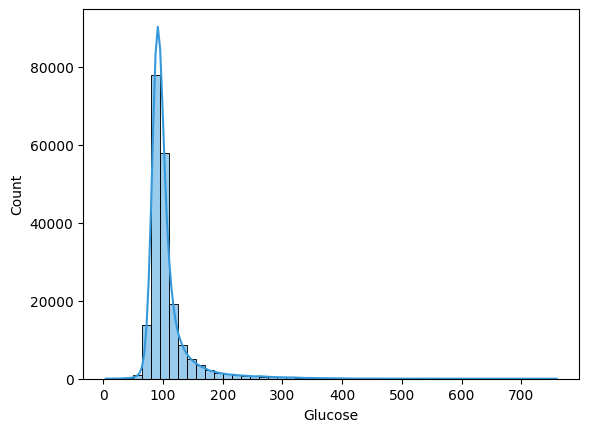

In [ ]:
sns.histplot(x=df['Glucose'],kde=True,  bins=50, color='#3498db'); # check Glucose values are normally distributed?
# Histogram with KDE for Glucose

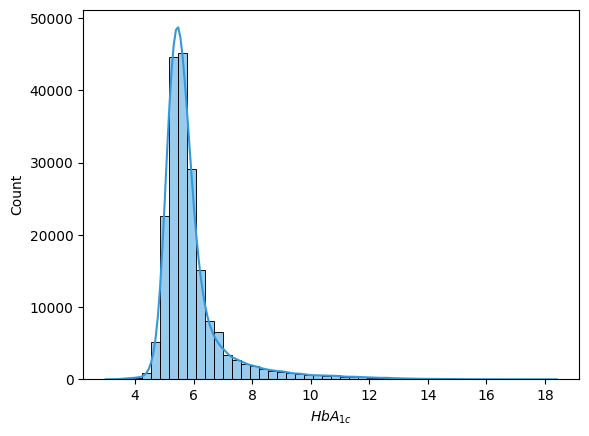

In [ ]:
sns.histplot(x=df['$HbA_{1c}$'],kde=True, color='#3498db', bins=50);  # check HbA1c values are normally distributed?

In [ ]:
ist=df.describe().T  # data statistics
ist

,count,mean,std,min,25%,50%,75%,max
Age,197180.00,46.21,17.73,1.00,32.00,47.00,60.00,124.00
Glucose,197180.00,105.65,38.93,4.00,87.00,95.00,108.00,759.00
$HbA_{1c}$,197180.00,5.92,1.18,3.00,5.30,5.60,6.00,18.40


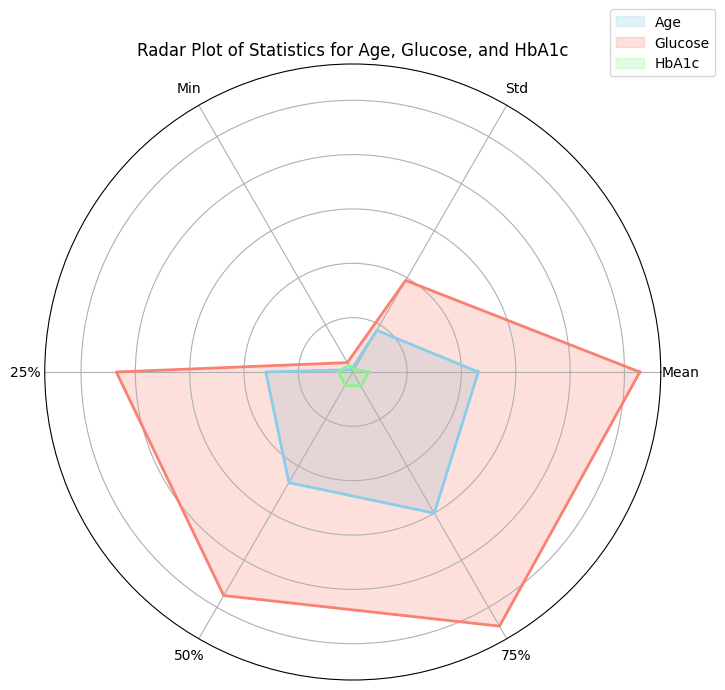

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Step 1: Prepare the Data
labels = np.array(['Mean', 'Std', 'Min', '25%', '50%', '75%'])
age_stats = np.array([46.21, 17.73, 1.00, 32.00, 47.00, 60.00])
glucose_stats = np.array([105.65, 38.93, 4.00, 87.00, 95.00, 108.00])
hbA1c_stats = np.array([ 5.92, 1.18, 3.00, 5.30, 5.60, 6.00])

# Step 2: Set up the radar chart
num_vars = len(labels)

# Split the circle into even parts and place each label at the angle of each part
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart needs to be a closed shape
age_stats = np.concatenate((age_stats,[age_stats[0]]))
glucose_stats = np.concatenate((glucose_stats,[glucose_stats[0]]))
hbA1c_stats = np.concatenate((hbA1c_stats,[hbA1c_stats[0]]))
angles += angles[:1]

# Step 3: Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, age_stats, color='skyblue', alpha=0.25, label='Age')
ax.fill(angles, glucose_stats, color='salmon', alpha=0.25, label='Glucose')
ax.fill(angles, hbA1c_stats, color='lightgreen', alpha=0.25, label='HbA1c')

ax.plot(angles, age_stats, color='skyblue', linewidth=2)
ax.plot(angles, glucose_stats, color='salmon', linewidth=2)
ax.plot(angles, hbA1c_stats, color='lightgreen', linewidth=2)

# Add labels to the plot
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.title("Radar Plot of Statistics for Age, Glucose, and HbA1c")
plt.show()


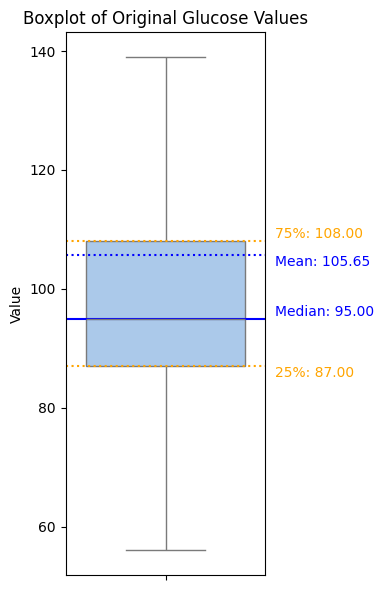

In [ ]:

glucose_data = df['Glucose']

# Calculate the statistics
count = len(glucose_data)
mean = glucose_data.mean()
std = glucose_data.std()
min_val = glucose_data.min()
q1 = glucose_data.quantile(0.25)
median = glucose_data.median()
q3 = glucose_data.quantile(0.75)
max_val = glucose_data.max()


# Create the boxplot using Seaborn
plt.figure(figsize=(4, 6))
sns.boxplot(y=glucose_data, palette="pastel", showfliers=False)

# Add statistics as annotations on the plot lines
plt.axhline(y=mean, color='blue', linestyle=':', label='Mean')
plt.text(0.55, mean, f'Mean: {mean:.2f}', va='top', ha='left', color='blue')

#plt.axhline(y=std, color='purple', linestyle='-', label='Std')
#plt.text(0.95, std, f'Std: {std:.2f}', va='bottom', ha='left', color='purple')

#plt.axhline(y=min_val, color='red', linestyle=':', label='Min')
#plt.text(0.65, min_val, f'Min: {min_val:.2f}', va='bottom', ha='left', color='red')

plt.axhline(y=q1, color='orange', linestyle=':', label='25%')
plt.text(0.55, q1, f'25%: {q1:.2f}', va='top', ha='left', color='orange')

plt.axhline(y=median, color='blue', linestyle='-', label='Median')
plt.text(0.55, median, f'Median: {median:.2f}', va='bottom', ha='left', color='blue')

plt.axhline(y=q3, color='orange', linestyle=':', label='75%')
plt.text(0.55, q3, f'75%: {q3:.2f}', va='bottom', ha='left', color='orange')

#plt.axhline(y=max_val, color='red', linestyle=':', label='Max')
#plt.text(0.65, max_val, f'Max: {max_val:.2f}', va='bottom', ha='left', color='brown')

plt.title('Boxplot of Original Glucose Values')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

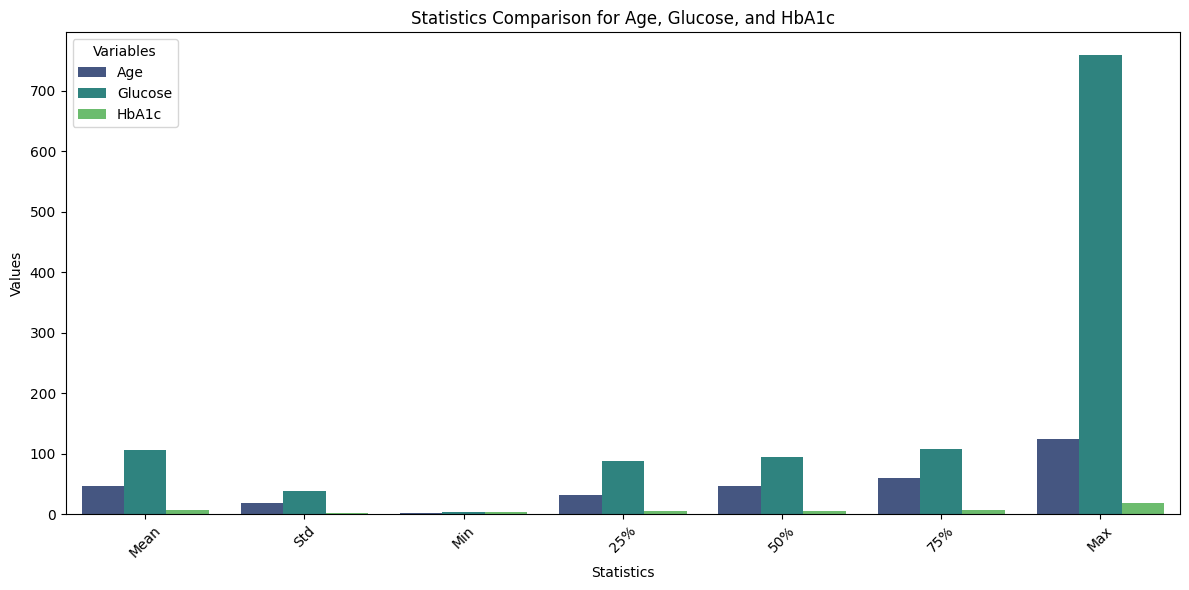

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the Data
data = {
    'Statistic': [ 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'],
    'Age': [ 46.21, 17.73, 1.00, 32.00, 47.00, 60.00, 124.00],
    'Glucose': [ 105.65, 38.93, 4.00, 87.00, 95.00, 108.00, 759.00],
    'HbA1c': [ 5.92, 1.18, 3.00, 5.30, 5.60, 6.00, 18.40]
}

# Create a DataFrame
stats_df = pd.DataFrame(data)

# Step 2: Visualize the Data
# Melt the DataFrame for easier plotting
stats_long = pd.melt(stats_df, id_vars='Statistic', var_name='Variable', value_name='Value')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Statistic', y='Value', hue='Variable', data=stats_long, palette='viridis')

# Customize the plot
plt.title('Statistics Comparison for Age, Glucose, and HbA1c')
plt.ylabel('Values')
plt.xlabel('Statistics')
plt.xticks(rotation=45)
plt.legend(title='Variables')
plt.tight_layout()

# Show the plot
plt.show()

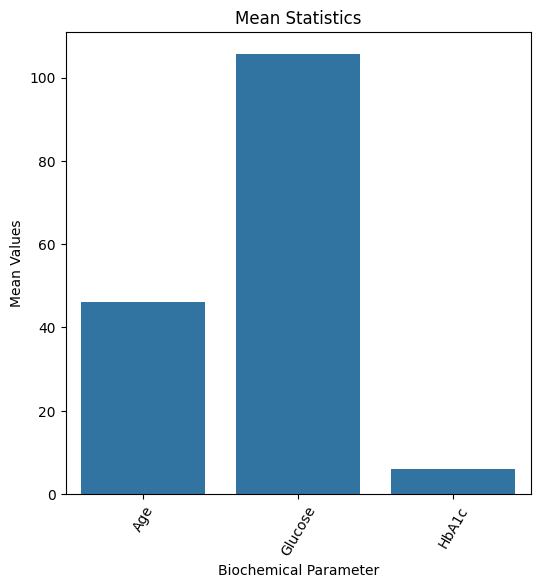

In [ ]:
# Graphical distribution of mean values
plt.figure(figsize=(6, 6))
sns.barplot(x=ist.index, y='mean', data=ist)
plt.title('Mean Statistics')
plt.xlabel('Biochemical Parameter')
plt.ylabel('Mean Values')
plt.xticks(rotation=60)
plt.show()

In [ ]:
print(ist)

            count   mean   std  min   25%   50%    75%    max
Age     197180.00  46.21 17.73 1.00 32.00 47.00  60.00 124.00
Glucose 197180.00 105.65 38.93 4.00 87.00 95.00 108.00 759.00
HbA1c   197180.00   5.92  1.18 3.00  5.30  5.60   6.00  18.40


# Correlation of Parameters

In [ ]:
df.corr(numeric_only=True) # Correlation betw columns

,Age,Glucose,$HbA_{1c}$,Gender_woman
Age,1.00,0.29,0.37,-0.07
Glucose,0.29,1.00,0.82,-0.11
$HbA_{1c}$,0.37,0.82,1.00,-0.11
Gender_woman,-0.07,-0.11,-0.11,1.00


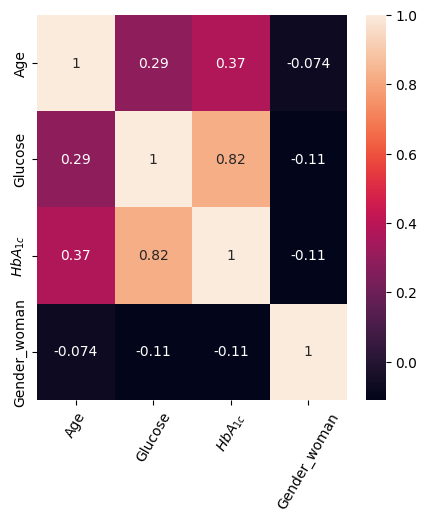

In [ ]:
# Korelasyon matriksi Örneğin; Glukoz HbA1c ile çok yüksek korelasyonda 0.83
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.xticks(rotation=60)
plt.show()

In [ ]:
abs(df.corr(numeric_only=True)['Glucose'].sort_values(ascending=False))

,Glucose
Glucose,1.00
$HbA_{1c}$,0.82
Age,0.29
Gender_woman,0.11


In [ ]:
a=abs(df.corr(numeric_only=True)['HbA1c'].sort_values(ascending=False))   # HbA1c


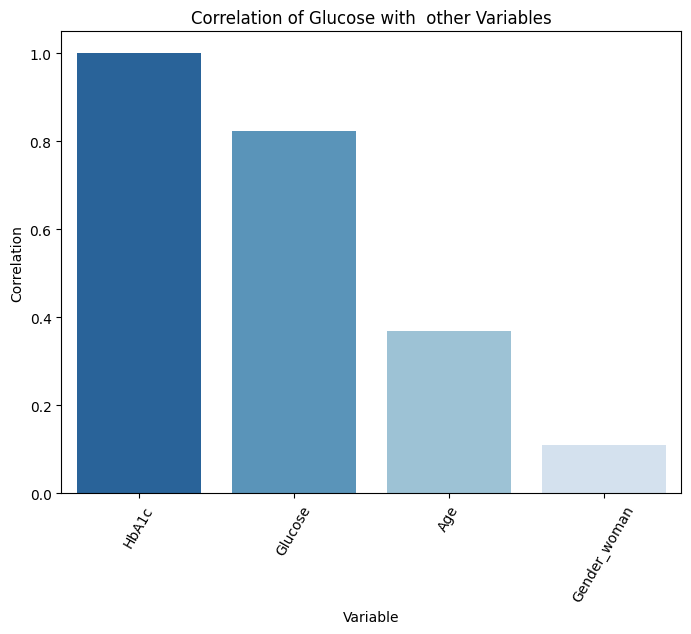

In [ ]:

plt.figure(figsize=(8, 6))
sns.barplot(x=a.index, y=a.values, palette=sns.color_palette("Blues_r", len(a)))
plt.title('Correlation of Glucose with  other Variables')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.xticks(rotation=60)
plt.show()

In [ ]:
df['Age'] = df['Age'].astype(int)

# EDA -- Exploratory Data Analysis

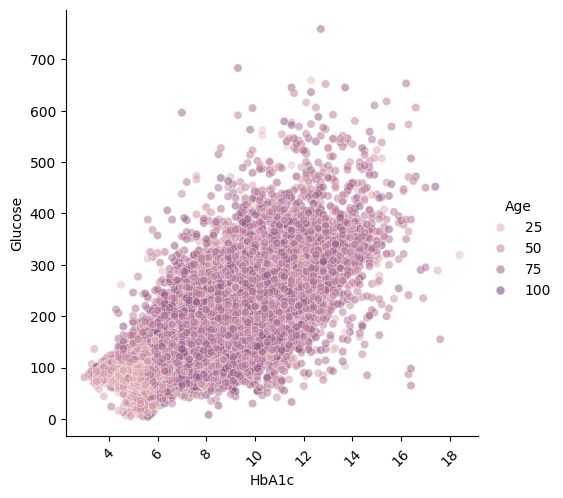

In [ ]:
rel=sns.relplot(x='HbA1c',y='Glucose',hue='Age', data=df, alpha=0.5)
plt.xticks(rotation=45)
plt.show()

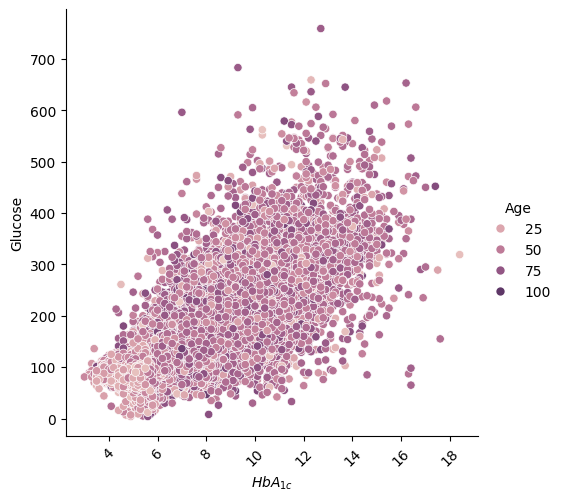

In [ ]:
rel=sns.relplot(x='$HbA_{1c}$',y='Glucose',hue='Age', data=df)
plt.xticks(rotation=45)
plt.show()

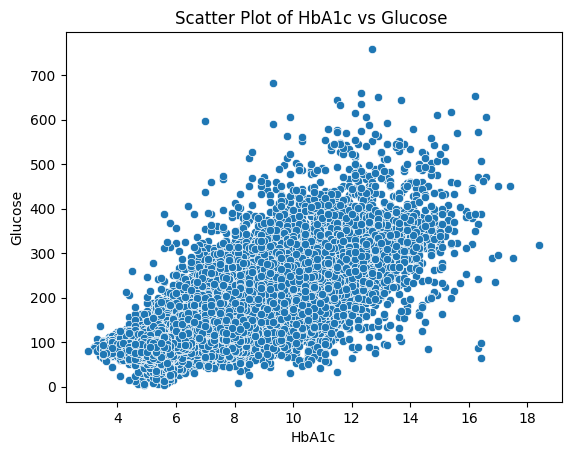

In [ ]:
# Scatter plot
sns.scatterplot(x='HbA1c', y='Glucose', data=df)
plt.xlabel('HbA1c')
plt.ylabel('Glucose')
plt.title('Scatter Plot of HbA1c vs Glucose ')
plt.show()

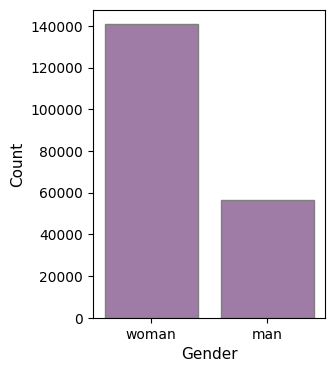

In [ ]:
plt.figure(figsize=(3, 4))
sns.countplot(x='Gender', data=df, color='#a275ac', edgecolor='grey')
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Count', fontsize=11);
#_woman

In [ ]:
# Machine Learning for 197K data

# Machine Learning for 197K data

In [ ]:
# TRUBA HPC : https://www.truba.gov.tr/index.php/en/main-page/
# Split DataFrame
data_chunks = np.array_split(df, 9)
models_results = []  # Sonuçları saklamak için bir liste

for idx, chunk in enumerate(data_chunks):

    # Özellikleri ve hedef sütunu seç
    X = chunk[['Age', 'HbA1c', 'Gender_woman']]  # Özellik sütunları
    y = chunk['Glucose']  # Hedef sütun

    # Eğitim ve test setlerine ayır
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # LazyRegressor kullanarak modelleri eğit
    reg = LazyRegressor()
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)

    # Model sonuçlarını DataFrame'e ekle
    results_df = models.reset_index()  # İndex'i resetle
    results_df['Chunk'] = f'Chunk {idx + 1}'  # Her chunk'a isim ver

    # Sonuçları listeye ekle
    models_results.append(results_df)

# Tüm sonuçları birleştir
final_results = pd.concat(models_results, ignore_index=True)


# Sonuçları görüntüle
display(final_results)

100%|██████████| 42/42 [06:12<00:00,  8.88s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 104.036744


100%|██████████| 42/42 [06:02<00:00,  8.63s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 105.765587


100%|██████████| 42/42 [05:59<00:00,  8.55s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 105.544798


100%|██████████| 42/42 [06:03<00:00,  8.66s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 106.247813



100%|██████████| 42/42 [06:07<00:00,  8.75s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 106.561240


100%|██████████| 42/42 [06:08<00:00,  8.78s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 106.374527


100%|██████████| 42/42 [06:03<00:00,  8.66s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 106.470279


100%|██████████| 42/42 [06:04<00:00,  8.69s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 17527, number of used features: 2
[LightGBM] [Info] Start training from score 105.750130


100%|██████████| 42/42 [06:08<00:00,  8.78s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 17526, number of used features: 2
[LightGBM] [Info] Start training from score 104.011782


,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Chunk
0,MLPRegressor,0.71,0.71,20.59,16.52,Chunk 1
1,ElasticNetCV,0.69,0.69,21.14,0.27,Chunk 1
2,LassoLars,0.69,0.69,21.15,0.02,Chunk 1
3,Lasso,0.69,0.69,21.15,0.11,Chunk 1
4,SGDRegressor,0.69,0.69,21.15,0.04,Chunk 1
...,...,...,...,...,...,...
373,RANSACRegressor,0.26,0.26,33.46,0.07,Chunk 9
374,DummyRegressor,-0.00,-0.00,38.93,0.02,Chunk 9
375,QuantileRegressor,-0.06,-0.06,40.10,12.69,Chunk 9
376,KernelRidge,-6.45,-6.44,106.20,79.38,Chunk 9


In [ ]:
#  the best score for each chunk
first_rows = final_results.groupby('Chunk').first().reset_index()
first_rows

,Chunk,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,Chunk 1,MLPRegressor,0.71,0.71,20.59,16.52
1,Chunk 2,MLPRegressor,0.68,0.68,22.04,17.54
2,Chunk 3,MLPRegressor,0.72,0.72,21.56,14.35
3,Chunk 4,MLPRegressor,0.70,0.70,22.36,14.21
4,Chunk 5,MLPRegressor,0.70,0.70,20.59,17.76
5,Chunk 6,MLPRegressor,0.69,0.69,22.62,15.27
6,Chunk 7,MLPRegressor,0.72,0.72,19.96,16.27
7,Chunk 8,MLPRegressor,0.71,0.71,20.94,15.24
8,Chunk 9,MLPRegressor,0.71,0.71,20.88,18.91


In [ ]:
# Transformations

# Machine Learning Data Transformation


In [ ]:
df['Log transformed'] = np.log(df['Glucose'] + 1)  # Adding 1 to avoid log(0)
df['Square-Root transformed'] = np.sqrt(df['Glucose'])
df['Box-Cox transformed'], _ = stats.boxcox(df['Glucose'] + 1)  # Adding 1 to avoid issues with zero values
df['Reciprocal transformed'] = 1 / (df['Glucose'] + 1)  # Adding 1 to avoid division by zero

df['exp_transformed'] = np.exp(df['Glucose'])
# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['Yeo-Johnson transformed'] = pt.fit_transform(df[['Glucose']])

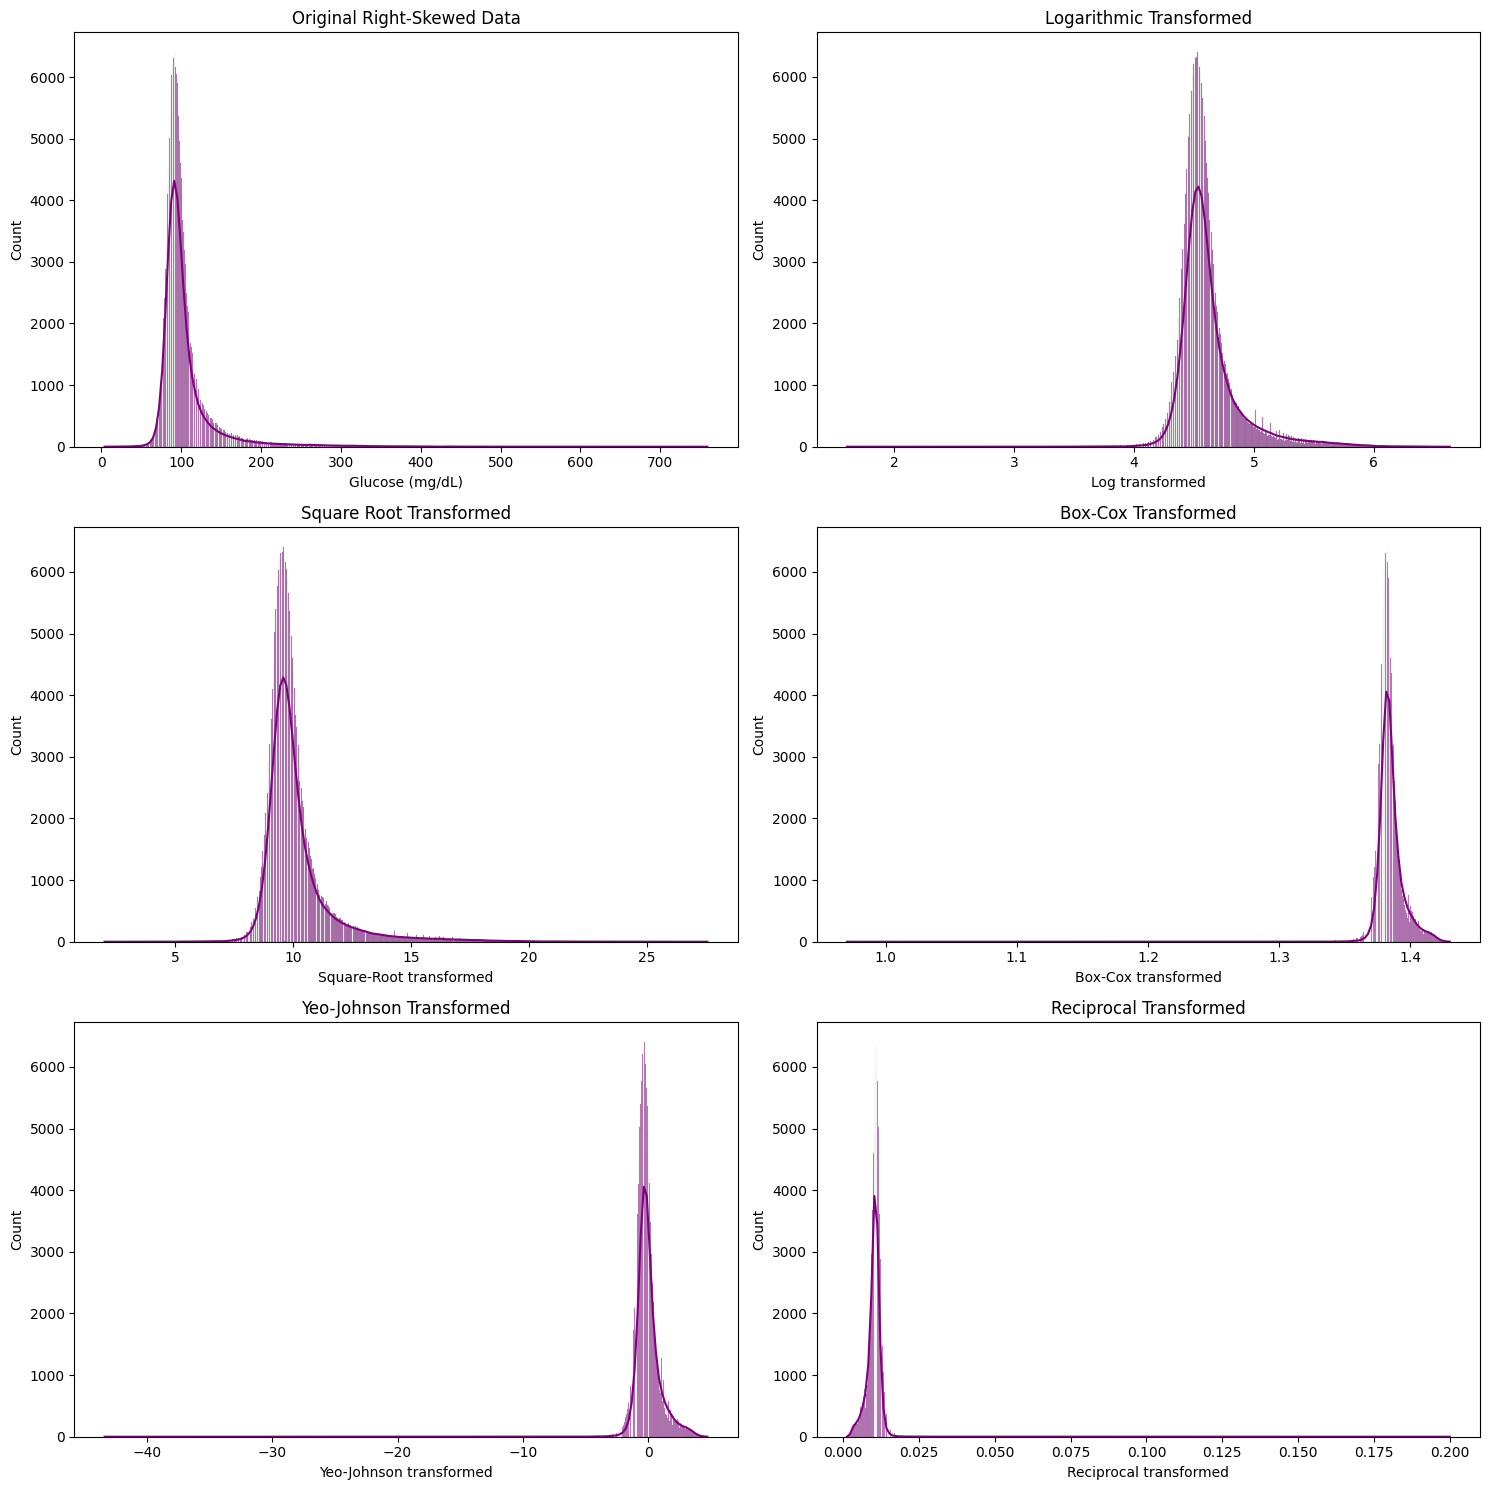

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df['Glucose'], kde=True, ax=axes[0, 0], color='purple')
axes[0, 0].set_xlabel('Glucose (mg/dL)')
axes[0, 0].set_title('Original Right-Skewed Data')

sns.histplot(df['Log transformed'], kde=True, ax=axes[0, 1], color='purple')
axes[0, 1].set_title('Logarithmic Transformed')

sns.histplot(df['Square-Root transformed'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Square Root Transformed')

sns.histplot(df['Box-Cox transformed'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Box-Cox Transformed')

sns.histplot(df['Yeo-Johnson transformed'], kde=True, ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Yeo-Johnson Transformed')

sns.histplot(df['Reciprocal transformed'], kde=True, ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Reciprocal Transformed')
plt.tight_layout()
plt.show()


In [ ]:


# Example columns to transform
transformed_columns = [
    'log_transformed',
    'sqrt_transformed',
    'boxcox_transformed',
    'reciprocal_transformed',
    'exp_transformed',
    'Glukoz_yeojohnson'
]

In [ ]:


models_results = []
random_sample = df.sample(n=21000, random_state=42)
for idx, chunk in enumerate(transformed_columns):


    X = random_sample[['Age', 'HbA1c', 'Gender_woman']]
    y = random_sample[chunk]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    reg = LazyRegressor()
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)


    results_df = models.reset_index()  # reset Index
    results_df['Transform'] = chunk


    models_results.append(results_df)

# concat results
final_results = pd.concat(models_results, ignore_index=True)


# Sonuçları görüntüle
display(final_results)

KeyError: 'log_transformed'

In [ ]:
# Different transformations give you different best models
first_rows = final_results.groupby('Transform').first().reset_index()
first_rows

,Transform,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,Glukoz_yeojohnson,MLPRegressor,0.58,0.58,0.65,6.50
1,boxcox_transformed,GradientBoostingRegressor,0.57,0.57,0.01,0.64
2,exp_transformed,AdaBoostRegressor,NaN,NaN,inf,0.04
3,log_transformed,SVR,0.66,0.66,0.15,6.83
4,reciprocal_transformed,GradientBoostingRegressor,0.52,0.52,0.00,0.94
5,sqrt_transformed,NuSVR,0.69,0.69,0.86,20.30


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
X = random_sample[['Age', 'HbA1c', 'Gender_woman']]
y = random_sample['Glucose']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [06:14<00:00,  8.91s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 2
[LightGBM] [Info] Start training from score 105.798526


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.70,0.70,21.21,17.51
LassoCV,0.68,0.68,21.89,0.63
Ridge,0.68,0.68,21.89,0.02
RidgeCV,0.68,0.68,21.89,0.02
BayesianRidge,0.68,0.68,21.89,0.04
LassoLarsCV,0.68,0.68,21.89,0.08
LassoLarsIC,0.68,0.68,21.89,0.05
LarsCV,0.68,0.68,21.89,0.04
Lars,0.68,0.68,21.89,0.03


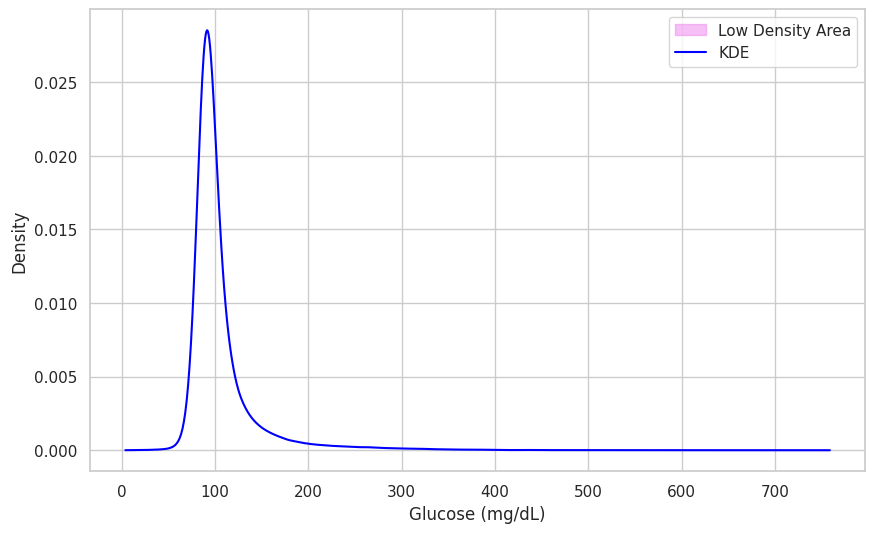

Low Density Glucose values start from: [558.72472472]


In [ ]:

#  Outlier detection (IQR )
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df['Glucose'] >= lower_bound) & (df['Glucose'] <= upper_bound)]

# Kernel Density Prediction
glukoz_values = df['Glucose'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(glukoz_values)


x_d = np.linspace(min(glukoz_values), max(glukoz_values), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_d)
density = np.exp(log_density)

# 5. Düşük yoğunluk alanlarını belirleme
density_threshold = np.percentile(density, 25)  # %25 yoğunluk eşiği
low_density_indices = np.where(density < density_threshold)[0]
low_density_glukoz_values = x_d[low_density_indices]


# Plotting the results
plt.figure(figsize=(10, 6))
plt.fill_between(x_d.flatten(), density, where=(density < density_threshold), color='violet', alpha=0.5, label='Low Density Area')
plt.plot(x_d, density, color='blue', label='KDE')
#plt.title('Kernel Density Estimation of Glucose Values')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Density')

plt.legend()

plt.show()

# Display the results
print("Low Density Glucose values start from:", low_density_glukoz_values[0])

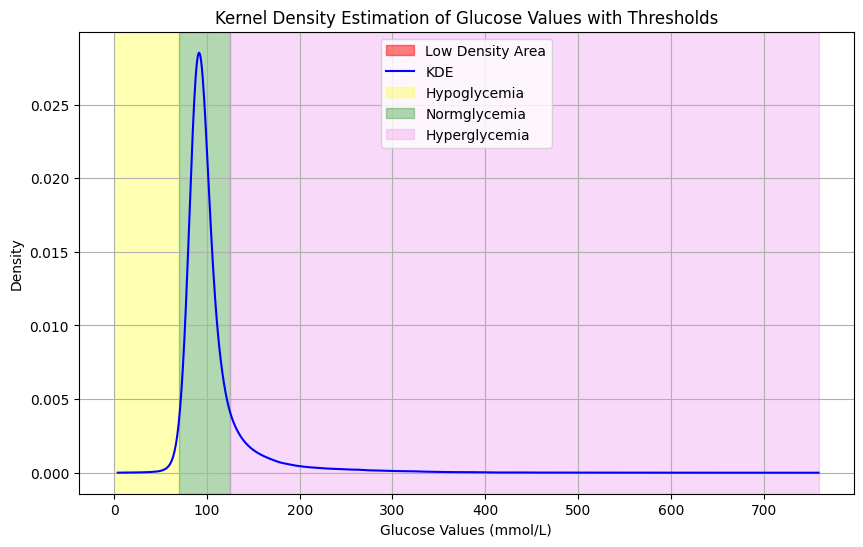

Low Density Glucose values start from: [558.72472472]


In [ ]:


glukoz_values = df['Glucose'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(glukoz_values)

x_d = np.linspace(min(glukoz_values), max(glukoz_values), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_d)
density = np.exp(log_density)

density_threshold = np.percentile(density, 25)
low_density_indices = np.where(density < density_threshold)[0]
low_density_glukoz_values = x_d[low_density_indices]


hypo_threshold = 70
hyper_threshold = 125
target_range = (70, 125)


plt.figure(figsize=(10, 6))


plt.fill_between(
    x_d.flatten(), density, where=(density < density_threshold),
    color='violet', alpha=0.5, label='Low Density Area'
)
x_d_flattened = x_d.flatten()

plt.plot(x_d, density, color='blue', label='KDE')


plt.axvspan(0, hypo_threshold, color='yellow', alpha=0.3, label='Hypoglycemia')


plt.axvspan(target_range[0], target_range[1], color='green', alpha=0.3, label='Normglycemia')


plt.axvspan(hyper_threshold, max(x_d_flattened), color='lightblue', alpha=0.3, label='Hyperglycemia')


plt.title('Kernel Density Estimation of Glucose Values with Thresholds')
plt.xlabel('Glucose Values (mmol/L)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


print("Low Density Glucose values start from:", low_density_glukoz_values[0])


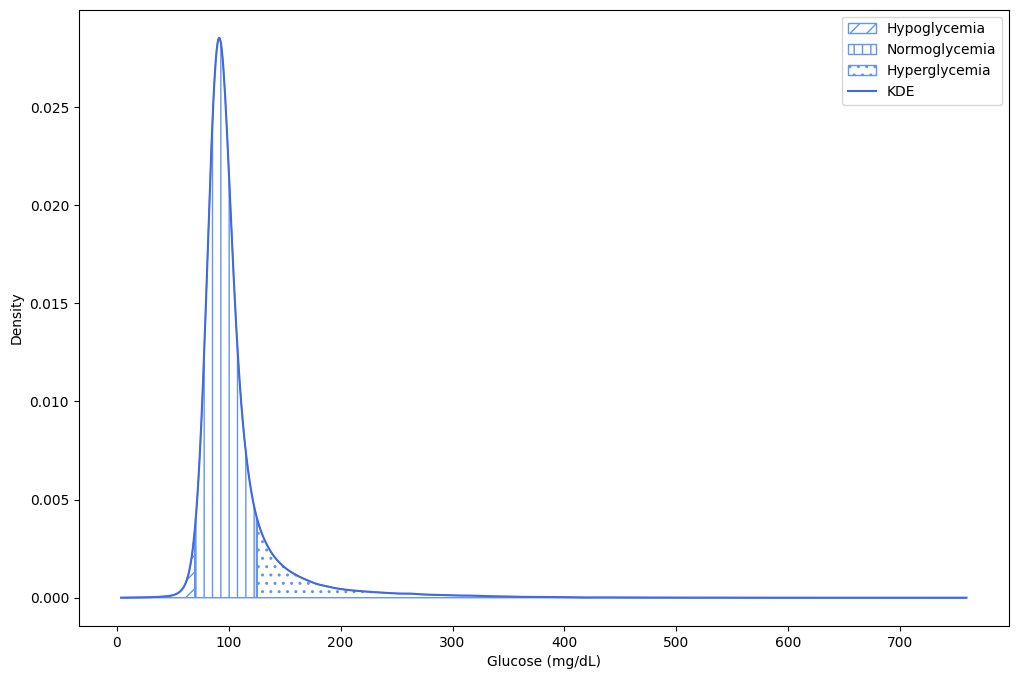

In [ ]:

from sklearn.neighbors import KernelDensity


df_filtered = df[(df['Glucose'] >= lower_bound) & (df['Glucose'] <= upper_bound)]


glukoz_values = df['Glucose'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(glukoz_values)


x_d = np.linspace(min(glukoz_values), max(glukoz_values), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_d)
density = np.exp(log_density)

density_threshold = np.percentile(density, 25)
low_density_indices = np.where(density < density_threshold)[0]
low_density_glukoz_values = x_d[low_density_indices]


glukoz_values = df['Glucose'].values.reshape(-1, 1)


kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(glukoz_values)


x_d = np.linspace(min(glukoz_values), max(glukoz_values), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_d)
density = np.exp(log_density)


hypo_threshold = 70
hyper_threshold = 125
norm_range = (70, 125)


plt.figure(figsize=(12, 8))


plt.fill_between(x_d.flatten(), density, where=(x_d.flatten() < hypo_threshold),
                 hatch='//', edgecolor='cornflowerblue', facecolor='none', label='Hypoglycemia')

plt.fill_between(x_d.flatten(), density, where=((x_d.flatten() >= norm_range[0]) & (x_d.flatten() <= norm_range[1])),
                 hatch='||', edgecolor='cornflowerblue', facecolor='none', label='Normoglycemia')


plt.fill_between(x_d.flatten(), density, where=(x_d.flatten() > hyper_threshold),
                 hatch='..', edgecolor='cornflowerblue', facecolor='none', label='Hyperglycemia')

# KDE line
plt.plot(x_d, density, color='royalblue', label='KDE')


plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Density')
plt.legend()
#Kernel Density Estimation with Pattern Fill

plt.show()


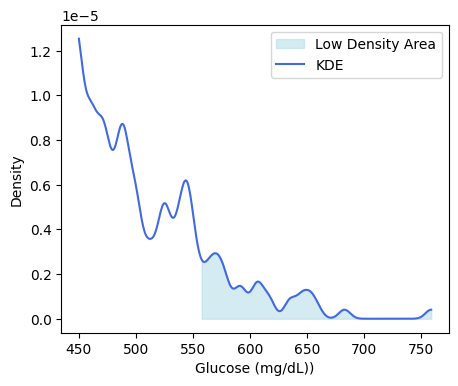

Low Density Glucose values start from: [665.49498998]


In [ ]:

plt.figure(figsize=(5, 4))


x_d_zoom = np.linspace(450, max(x_d), 500).reshape(-1, 1)
log_density_zoom = kde.score_samples(x_d_zoom)
density_zoom = np.exp(log_density_zoom)


density_threshold_zoom = np.percentile(density_zoom, 25)
low_density_indices_zoom = np.where(density_zoom < density_threshold_zoom)[0]
low_density_glukoz_values_zoom = x_d_zoom[low_density_indices_zoom]


closest_index = np.argmin(np.abs(x_d_zoom - 558))


plt.fill_between(x_d_zoom.flatten()[closest_index:], density_zoom[closest_index:], color='lightblue', alpha=0.5, label='Low Density Area')
plt.plot(x_d_zoom, density_zoom, color='royalblue', label='KDE')
plt.xlabel('Glucose (mg/dL))')
plt.ylabel('Density')

plt.legend()

plt.show()

print("Low Density Glucose values start from:", low_density_glukoz_values_zoom[0])

In [ ]:


mean_glukoz = df['Glucose'].mean()


std_dev_glukoz = df['Glucose'].std()


lower_bound = mean_glukoz - 3 * std_dev_glukoz
upper_bound = mean_glukoz + 3 * std_dev_glukoz

print(f"Glukoz için ortalama: {mean_glukoz:.2f}")
print(f"Standart sapma: {std_dev_glukoz:.2f}")
print(f"±3 standart sapma aralığı: [{lower_bound:.2f}, {upper_bound:.2f}]")

Glukoz için ortalama: 105.65
Standart sapma: 38.93
±3 standart sapma aralığı: [-11.14, 222.43]


In [ ]:
# Low density area composes % area of total
df_=df[df['Glucose'] < 550]
df_1=df[df['Glucose'] > 550]
len(df_1)

total_count = len(df)

count_below_550 = len(df[df['Glucose'] < 550])


percentage_below_550 = (count_below_550 / total_count) * 100
percentage_below_550

99.98123541941374

# Data Augmentation with oversampling in minority data  area

In [ ]:
# Filter data from low density area
df_1 = df[df['Glucose'] > 550]

# Increase data in low density area with oversampling
n_repeats = 500
df2 = pd.concat([df] + [df_1] * n_repeats, ignore_index=True)


In [ ]:
len(df2)

215680

In [ ]:
len(df)

197180

In [ ]:
# NEW Low density area composes % area of total
df_=df2[df2['Glucose'] < 550]
df_1=df2[df2['Glucose'] > 550]
len(df_1)

total_count = len(df2)


count_below_550 = len(df2[df2['Glucose'] < 550])


percentage_below_550 = (count_below_550 / total_count) * 100
percentage_below_550

91.40532270029674

In [ ]:
ist2=df2.describe().T
ist2

,count,mean,std,min,25%,50%,75%,max
Age,215680.00,46.93,17.85,1.00,33.00,48.00,60.00,124.00
Glucose,215680.00,147.97,143.68,4.00,88.00,97.00,116.00,759.00
$HbA_{1c}$,215680.00,6.48,2.24,3.00,5.30,5.70,6.30,18.40


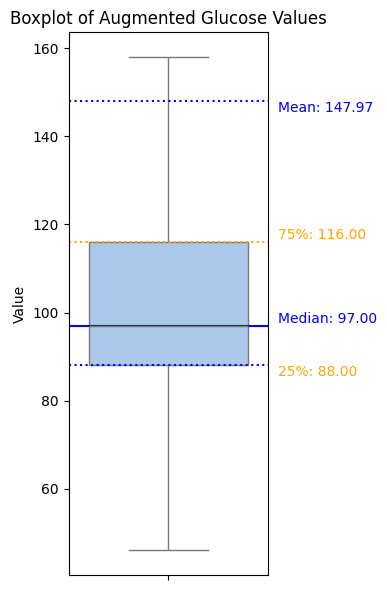

In [ ]:

glucose_data = df2['Glucose']

# Calculate the statistics
count = len(glucose_data)
mean = glucose_data.mean()
std = glucose_data.std()
min_val = glucose_data.min()
q1 = glucose_data.quantile(0.25)
median = glucose_data.median()
q3 = glucose_data.quantile(0.75)
max_val = glucose_data.max()


# Create the boxplot using Seaborn
plt.figure(figsize=(4, 6))
sns.boxplot(y=glucose_data, palette="pastel", showfliers=False)

# Add statistics as annotations on the plot lines
plt.axhline(y=mean, color='blue', linestyle=':', label='Mean')
plt.text(0.55, mean, f'Mean: {mean:.2f}', va='top', ha='left', color='blue')

#plt.axhline(y=std, color='purple', linestyle='-', label='Std')
#plt.text(0.95, std, f'Std: {std:.2f}', va='bottom', ha='left', color='purple')

#plt.axhline(y=min_val, color='red', linestyle=':', label='Min')
#plt.text(0.65, min_val, f'Min: {min_val:.2f}', va='bottom', ha='left', color='red')

plt.axhline(y=q1, color='blue', linestyle=':', label='25%')
plt.text(0.55, q1, f'25%: {q1:.2f}', va='top', ha='left', color='orange')

plt.axhline(y=median, color='blue', linestyle='-', label='Median')
plt.text(0.55, median, f'Median: {median:.2f}', va='bottom', ha='left', color='blue')

plt.axhline(y=q3, color='orange', linestyle=':', label='75%')
plt.text(0.55, q3, f'75%: {q3:.2f}', va='bottom', ha='left', color='orange')

#plt.axhline(y=max_val, color='red', linestyle=':', label='Max')
#plt.text(0.65, max_val, f'Max: {max_val:.2f}', va='bottom', ha='left', color='red')

plt.title('Boxplot of Augmented Glucose Values')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
# Best result MLP regressor for glucose unchanged prediction
from sklearn.feature_selection import VarianceThreshold
X = df[['Age', '$HbA_{1c}$', 'Gender_woman']]  # Özellikler
y = df['Glucose']  # Hedef değişken
# Create a VarianceThreshold object with a threshold of 0.1

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# MLPRegressor modelini tanımla
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Modeli eğit
mlp.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

y_pred = mlp.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Squared Error: 464.53
R^2 Score: 0.69
Root Mean Squared Error: 21.55


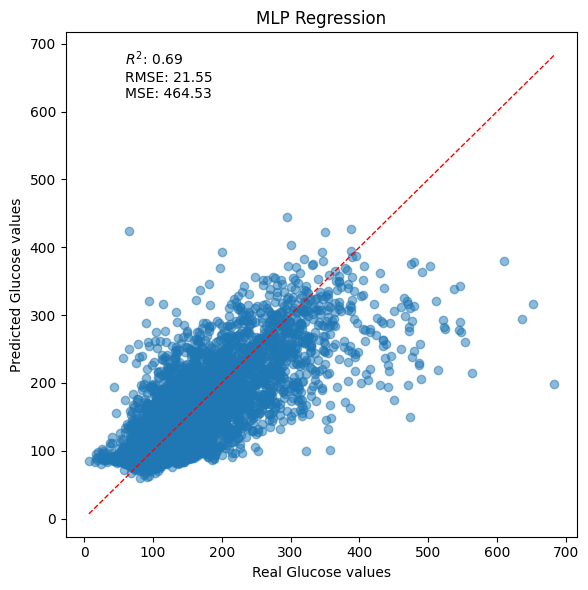

In [ ]:
# Traditional linear prediction method was :
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1)
plt.text(60, 668, f'$R^2$: {r2:.2f}', color='black', fontsize=10)
plt.text(60, 643, f'RMSE: {rmse:.2f}', color='black', fontsize=10)
plt.text(60, 620, f'MSE: {mse:.2f}', color='black', fontsize=10)
plt.xlabel('Real Glucose values')
plt.ylabel('Predicted Glucose values')
plt.title(f'MLP Regression')

plt.tight_layout()
plt.show()

In [ ]:
# Lineer regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse = math.sqrt(mse_linear)


print(f'Linear Regression:')
print(f'Mean Squared Error: {mse_linear:.2f}')
print(f'R^2 Score: {r2_linear:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Linear Regression:
Mean Squared Error: 490.83
R^2 Score: 0.67
Root Mean Squared Error: 22.15


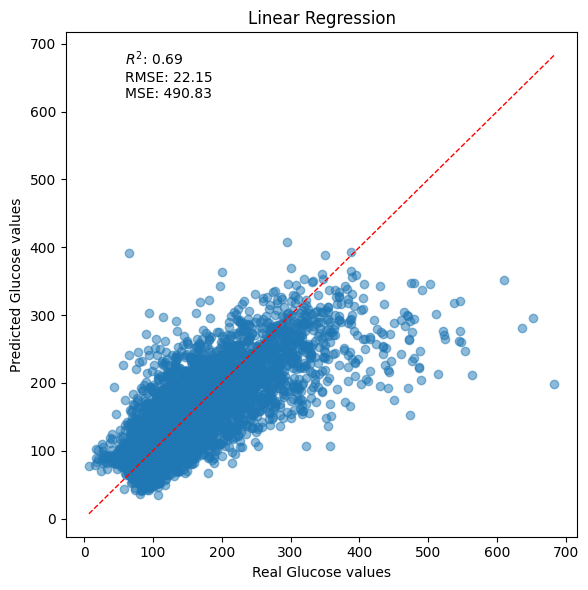

In [ ]:
# Traditional linear prediction method was :
plt.figure(figsize=(6, 6))
plt.scatter(y_test,  y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1)
plt.text(60, 668, f'$R^2$: {r2:.2f}', color='black', fontsize=10)
plt.text(60, 643, f'RMSE: {rmse:.2f}', color='black', fontsize=10)
plt.text(60, 620, f'MSE: {mse_linear:.2f}', color='black', fontsize=10)
plt.xlabel('Real Glucose values')
plt.ylabel('Predicted Glucose values')
plt.title(f'Linear Regression')
plt.tight_layout()
plt.show()

In [1]:
# LOG- GB REGRESSİON

In [ ]:
# Best result MLP regressor for glucose unchanged prediction
from sklearn.feature_selection import VarianceThreshold
X = df[['Age', '$HbA_{1c}$', 'Gender_woman']]  # Özellikler
y = df['Log transformed']  # Hedef değişken
# Create a VarianceThreshold object with a threshold of 0.1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# GradientBoostingRegressor Model was selected from the literature
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:

y_pred = gbr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse )


print(f'Log-transformed GBRegression:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')



Log-transformed GBRegression:
Mean Squared Error: 0.02
R^2 Score: 0.67
Root Mean Squared Error: 0.15


In [ ]:
len(y_test)

39436

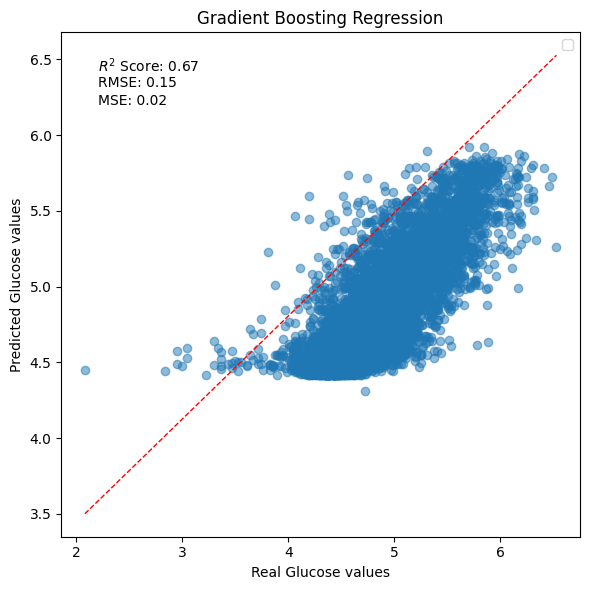

In [ ]:
# Scatter plot with predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred,  alpha=0.5)
plt.plot([min(y_test), max(y_test)],[ 3.5, max(y_test)], 'r--', lw=1)

# Annotate RMSE values on the plot
plt.text(2.2, 6.20, f'MSE: {mse:.2f}', color='black', fontsize=10)
plt.text(2.2, 6.32, f'RMSE: {rmse:.2f}', color='black', fontsize=10)
plt.text(2.2, 6.42, f'$R^2$ Score: {r2:.2f}', color='black', fontsize=10)
plt.xlabel('Real Glucose values')
plt.ylabel('Predicted Glucose values')
plt.title(f'Gradient Boosting Regression' )
plt.legend()
plt.tight_layout()
plt.show()



# Oversampling ML


In [ ]:
# Effect of OVERSAMPLING on ML
from sklearn.feature_selection import VarianceThreshold
X = df2[['Age', '$HbA_{1c}$', 'Gender_woman']]
y = df2['Log transformed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# GradientBoostingRegressor Model was selected from the literature
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğit
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse )
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'$R^2$ Score: {r2:.2f}')

Root Mean Squared Error: 0.16
Mean Squared Error: 0.03
$R^2$ Score: 0.91


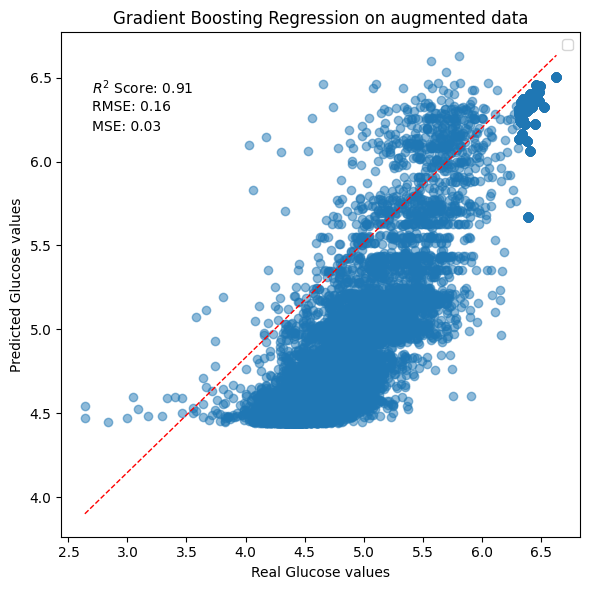

In [ ]:
# Scatter plot with predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred,  alpha=0.5)
plt.plot([min(y_test), max(y_test)], [3.9, max(y_test)], 'r--', lw=1)

# Annotate RMSE values on the plot
plt.text(2.7, 6.30, f'RMSE: {rmse:.2f}', color='black', fontsize=10)
plt.text(2.7,6.18, f'MSE: {mse:.2f}', color='black', fontsize=10)
plt.text(2.7,6.40, f'$R^2$ Score: {r2:.2f}', color='black', fontsize=10)


plt.xlabel('Real Glucose values')
plt.ylabel('Predicted Glucose values')
plt.title('Gradient Boosting Regression on augmented data' )
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df2 = df2.rename(columns={ '$HbA_{1c}$': 'HbA1c'  })

In [ ]:
df2

,Age,Glucose,HbA1c,Gender_woman,Log transformed,Square-Root transformed,Box-Cox transformed,Reciprocal transformed,exp_transformed,Yeo-Johnson transformed
0,36,80.00,5.30,True,4.39,8.94,1.38,0.01,55406223843935098344518031635382272.00,-0.99
1,24,87.00,5.40,False,4.48,9.33,1.38,0.01,60760302250568719065170691650937159680.00,-0.59
2,61,118.00,7.40,False,4.78,10.86,1.39,0.01,17650168856917655466968240146746288630911057568...,0.70
3,50,79.00,5.30,True,4.38,8.89,1.38,0.01,20382810665126688239604997451415552.00,-1.05
4,46,95.00,5.90,False,4.56,9.75,1.38,0.01,181123908288902334832971246827918212464640.00,-0.19
...,...,...,...,...,...,...,...,...,...,...
215675,54,569.00,11.80,True,6.35,23.85,1.43,0.00,12988536015743820265097944786135981163929990581...,4.36
215676,58,567.00,12.80,False,6.34,23.81,1.43,0.00,17578072005196348650161731288057740238675462491...,4.35
215677,50,652.00,12.90,True,6.48,25.53,1.43,0.00,14454470959728666618591346086776737547752963331...,4.52
215678,51,555.00,12.10,True,6.32,23.56,1.43,0.00,10800340716202017915566004731865563992345562575...,4.32


In [ ]:

from lightgbm import LGBMRegressor
#df = df.rename(columns={ '$HbA_{1c}$': 'HbA1c'  })
X = df2[['Age', 'HbA1c', 'Gender_woman']]
y = df2['Log transformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LGBM regressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 172544, number of used features: 3
[LightGBM] [Info] Start training from score 4.779444
Mean Squared Error: 0.02
Root Mean Squared Error: 0.14
R^2 Score: 0.93


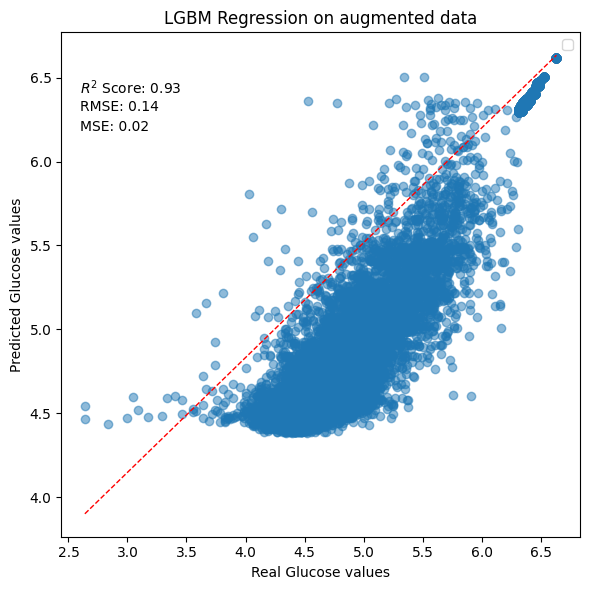

In [ ]:
# Scatter plot with predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred,  alpha=0.5)
plt.plot([min(y_test), max(y_test)], [3.9, max(y_test)], 'r--', lw=1)

# Annotate RMSE values on the plot
plt.text(2.6, 6.30, f'RMSE: {rmse:.2f}', color='black', fontsize=10)
plt.text(2.6,6.18, f'MSE: {mse:.2f}', color='black', fontsize=10)
plt.text(2.6,6.40, f'$R^2$ Score: {r2:.2f}', color='black', fontsize=10)


plt.xlabel('Real Glucose values')
plt.ylabel('Predicted Glucose values')
plt.title('LGBM Regression on augmented data' )
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save model
joblib.dump(lgbm, 'lgbm_glucose_model.pkl')

['lgbm_glucose_model.pkl']

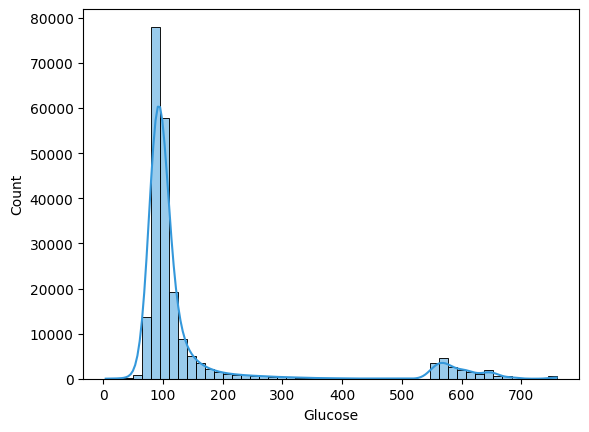

In [ ]:
sns.histplot(x=df2['Glucose'],kde=True,  bins=50, color='#3498db'); # check Glucose values are normally distributed?
# Histogram with KDE for Glucose after oversampling

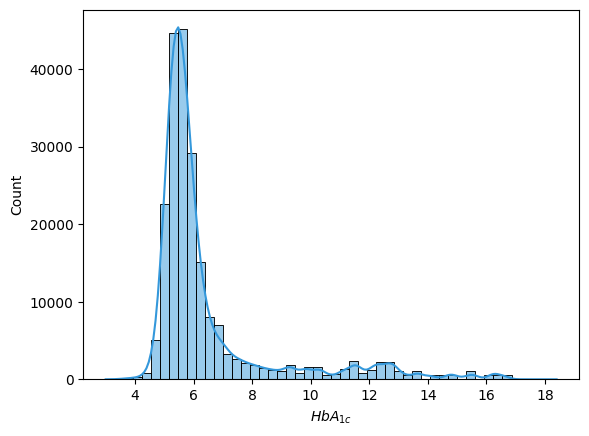

In [ ]:
# Histogram with KDE for Glucose after oversampling
sns.histplot(x=df2['$HbA_{1c}$'],kde=True, color='#3498db', bins=50);  # check HbA1c values are normally distributed?

[(0.0, 10.0)]

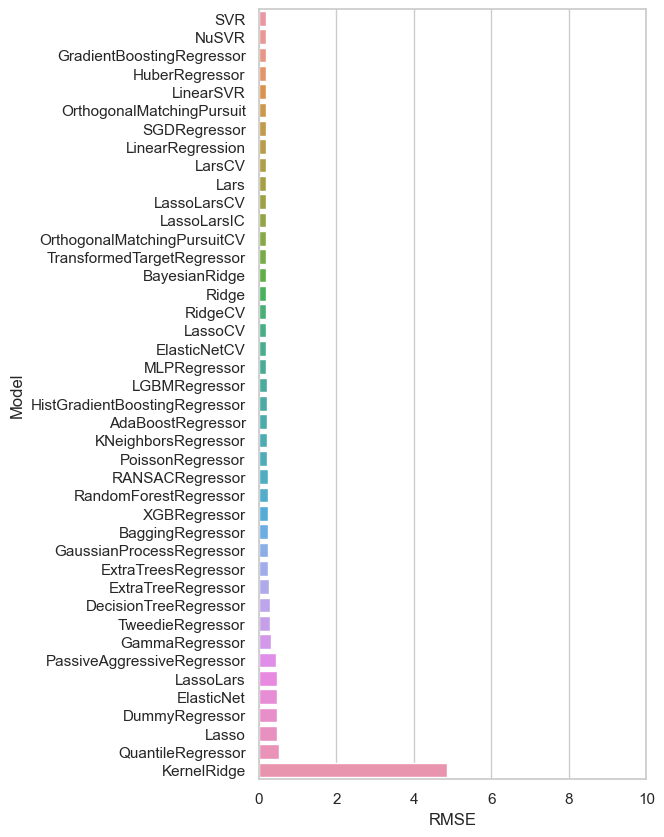

In [ ]:

# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_2.index, x="RMSE", data=models_2)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

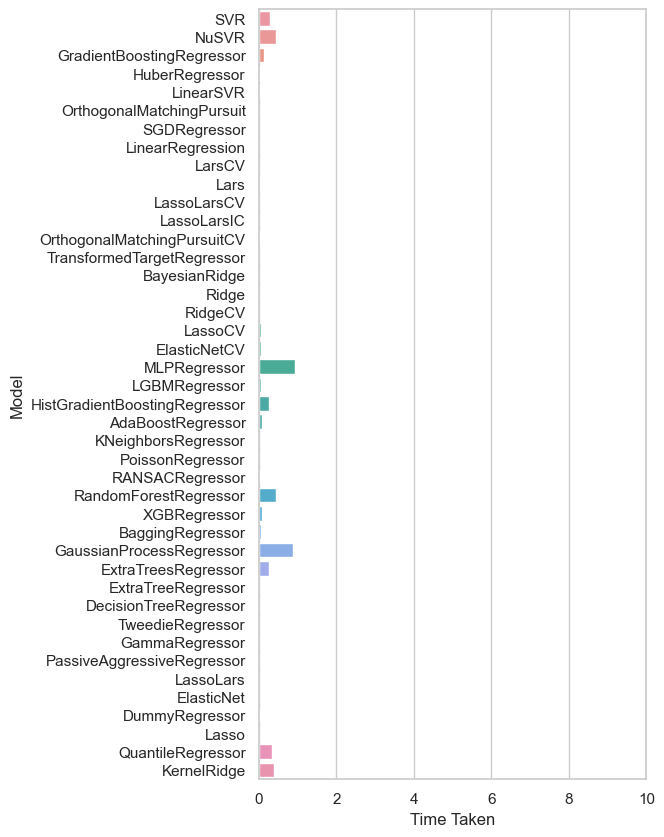

In [ ]:

# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_2.index, x="Time Taken", data=models_2)
ax.set(xlim=(0, 10))

In [ ]:
#Compare results with Classical Linear Regression

In [ ]:
X=df2[['HbA1c']]
y=df2['Glucose']
# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Lineer regresyon modelini oluştur ve eğit
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


# Tahminleri yap
y_pred_linear = linear_model.predict(X_test)


# Performans metriklerini hesapla
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse = math.sqrt(mse_linear)


print(f'Linear Regression:')
print(f'Mean Squared Error: {mse_linear:.2f}')
print(f'R^2 Score: {r2_linear:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Linear Regression:
Mean Squared Error: 4149.55
R^2 Score: 0.80
Root Mean Squared Error: 64.42


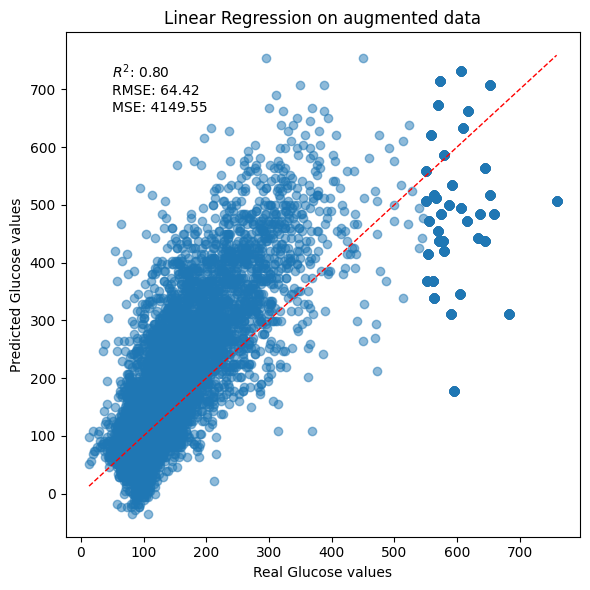

In [ ]:
# Traditional linear prediction method was :
plt.figure(figsize=(6, 6))
plt.scatter(y_test,  y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1)
plt.text(50, 720, f'$R^2$: {r2_linear:.2f}', color='black', fontsize=10)
plt.text(50, 690, f'RMSE: {rmse:.2f}', color='black', fontsize=10)
plt.text(50, 660, f'MSE: {mse_linear:.2f}', color='black', fontsize=10)
plt.xlabel('Real Glucose values')
plt.ylabel('Predicted Glucose values')
plt.title(f'Linear Regression on augmented data')
plt.tight_layout()
plt.show()

# ML for HbA1c prediction


In [ ]:
x=df2[['Age','Glucose','Gender_woman']]
y=df2['HbA1c']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
# GradientBoostingRegressor Model was selected from the literature
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = gbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.35
R^2 Score: 0.92


In [ ]:

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_2, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models_2)

 24%|██▍       | 10/42 [00:24<01:31,  2.85s/it]

[(0.0, 1.0)]

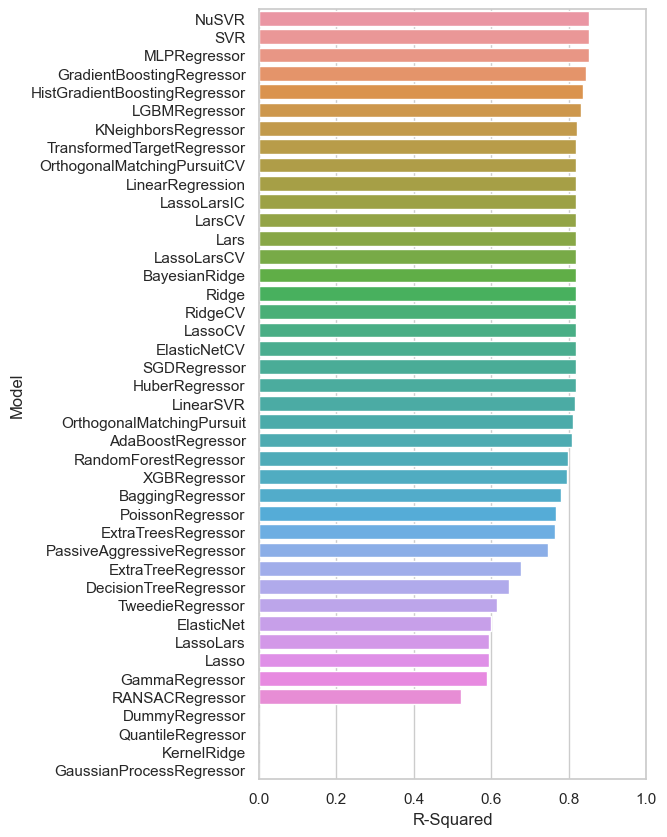

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_2.index, x="R-Squared", data=models_2)
ax.set(xlim=(0, 1))